In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_excel('./online_retail_II.xlsx', sheet_name='Year 2009-2010')
df_2 = pd.read_excel('./online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [3]:
df = pd.concat([df_1, df_2], ignore_index=True)

In [4]:
df = df[~df['Invoice'].astype(str).str.startswith('C')]

In [5]:
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]

In [6]:
# Add new features 

df['Revenue'] = df['Quantity'] * df['Price'] # (feature engineering)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M').astype(str) # (feature engineering)

In [7]:
monthly_revenue = df.groupby('Month')['Revenue'].sum().sort_index()

In [8]:
monthly_revenue

Month
2009-12     825685.760
2010-01     652708.502
2010-02     553339.736
2010-03     833570.131
2010-04     681528.992
2010-05     659858.860
2010-06     752270.140
2010-07     650712.940
2010-08     697274.910
2010-09     924333.011
2010-10    1165483.910
2010-11    1470272.482
2010-12    1262598.790
2011-01     691364.560
2011-02     523631.890
2011-03     717639.360
2011-04     537808.621
2011-05     770536.020
2011-06     761739.900
2011-07     719221.191
2011-08     759138.380
2011-09    1058590.172
2011-10    1154979.300
2011-11    1509496.330
2011-12     638810.680
Name: Revenue, dtype: float64

In [9]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

In [10]:
country_revenue

Country
United Kingdom    1.787098e+07
EIRE              6.644318e+05
Netherlands       5.542323e+05
Germany           4.312625e+05
France            3.569446e+05
Australia         1.699681e+05
Spain             1.091785e+05
Switzerland       1.010113e+05
Sweden            9.190372e+04
Denmark           6.986219e+04
Name: Revenue, dtype: float64

In [14]:
monthly_quantity = df.groupby('Month')['Quantity'].sum().sort_index()

In [15]:
monthly_quantity

Month
2009-12    426981
2010-01    391525
2010-02    382781
2010-03    527401
2010-04    368198
2010-05    397206
2010-06    408636
2010-07    338920
2010-08    473420
2010-09    585357
2010-10    622095
2010-11    728449
2010-12    540198
2011-01    387785
2011-02    283555
2011-03    377526
2011-04    308815
2011-05    395738
2011-06    389213
2011-07    401759
2011-08    421770
2011-09    570820
2011-10    623401
2011-11    754507
2011-12    314249
Name: Quantity, dtype: int64

In [17]:
import random

In [18]:
random.seed(123)

In [19]:
random_number = random.randint(1, 100) 
print(random_number)

7


In [20]:
random_number = random.randint(1, 100) 
print(random_number)

35


In [11]:
sample_df = df.sample(100, random_state=1)

In [12]:
sample_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month
31139,491969,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,1,2009-12-14 17:57:00,5.17,NaN,United Kingdom,5.17,2009-12
674546,549275,21320,GLASS CHALICE GREEN LARGE,11,2011-04-07 13:09:00,0.79,15916.0,United Kingdom,8.69,2011-04
31839,491971,22241,"GARLAND , WOODEN "" HAPPY EASTER""",1,2009-12-14 18:37:00,2.57,NaN,United Kingdom,2.57,2009-12
304640,519173,22138,BAKING SET 9 PIECE RETROSPOT,1,2010-08-13 14:20:00,4.95,18225.0,United Kingdom,4.95,2010-08
828579,563510,22959,WRAP CHRISTMAS VILLAGE,25,2011-08-17 10:50:00,0.42,15734.0,United Kingdom,10.50,2011-08
...,...,...,...,...,...,...,...,...,...,...
155659,504155,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-04-11 14:42:00,7.95,17858.0,United Kingdom,31.80,2010-04
189384,507377,21868,POTTING SHED TEA MUG,6,2010-05-09 11:35:00,1.25,13571.0,United Kingdom,7.50,2010-05
928865,571564,23284,DOORMAT KEEP CALM AND COME IN,2,2011-10-18 10:16:00,8.25,16019.0,United Kingdom,16.50,2011-10
811516,562014,23164,REGENCY CAKE SLICE,4,2011-08-01 14:05:00,4.95,14341.0,United Kingdom,19.80,2011-08


In [13]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 31139 to 988260
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      100 non-null    object        
 1   StockCode    100 non-null    object        
 2   Description  100 non-null    object        
 3   Quantity     100 non-null    int64         
 4   InvoiceDate  100 non-null    datetime64[ns]
 5   Price        100 non-null    float64       
 6   Customer ID  79 non-null     float64       
 7   Country      100 non-null    object        
 8   Revenue      100 non-null    float64       
 9   Month        100 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 8.6+ KB


Matplotlib - Scatter Plot

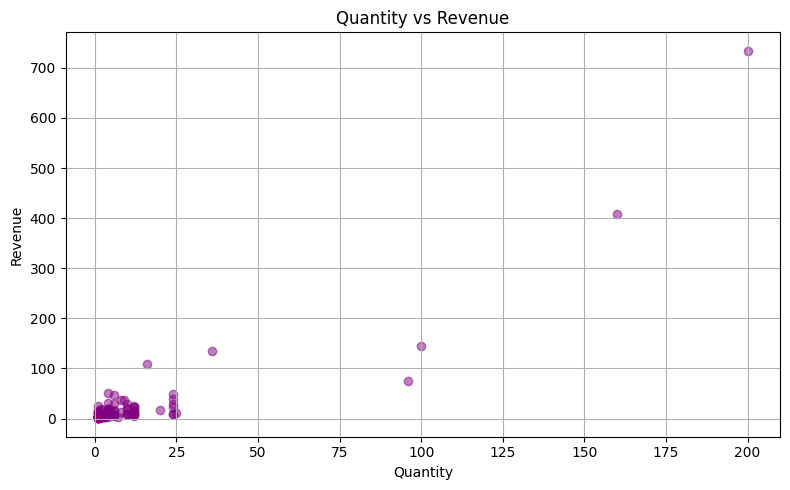

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(sample_df['Quantity'], sample_df['Revenue'], alpha=0.5, color='purple')
plt.xlabel("Quantity")
plt.ylabel("Revenue")
plt.title("Quantity vs Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

Matplotlib - Sub Plots

In [25]:
monthly_quantity

Month
2009-12    426981
2010-01    391525
2010-02    382781
2010-03    527401
2010-04    368198
2010-05    397206
2010-06    408636
2010-07    338920
2010-08    473420
2010-09    585357
2010-10    622095
2010-11    728449
2010-12    540198
2011-01    387785
2011-02    283555
2011-03    377526
2011-04    308815
2011-05    395738
2011-06    389213
2011-07    401759
2011-08    421770
2011-09    570820
2011-10    623401
2011-11    754507
2011-12    314249
Name: Quantity, dtype: int64

In [30]:
monthly_revenue

Month
2009-12     825685.760
2010-01     652708.502
2010-02     553339.736
2010-03     833570.131
2010-04     681528.992
2010-05     659858.860
2010-06     752270.140
2010-07     650712.940
2010-08     697274.910
2010-09     924333.011
2010-10    1165483.910
2010-11    1470272.482
2010-12    1262598.790
2011-01     691364.560
2011-02     523631.890
2011-03     717639.360
2011-04     537808.621
2011-05     770536.020
2011-06     761739.900
2011-07     719221.191
2011-08     759138.380
2011-09    1058590.172
2011-10    1154979.300
2011-11    1509496.330
2011-12     638810.680
Name: Revenue, dtype: float64

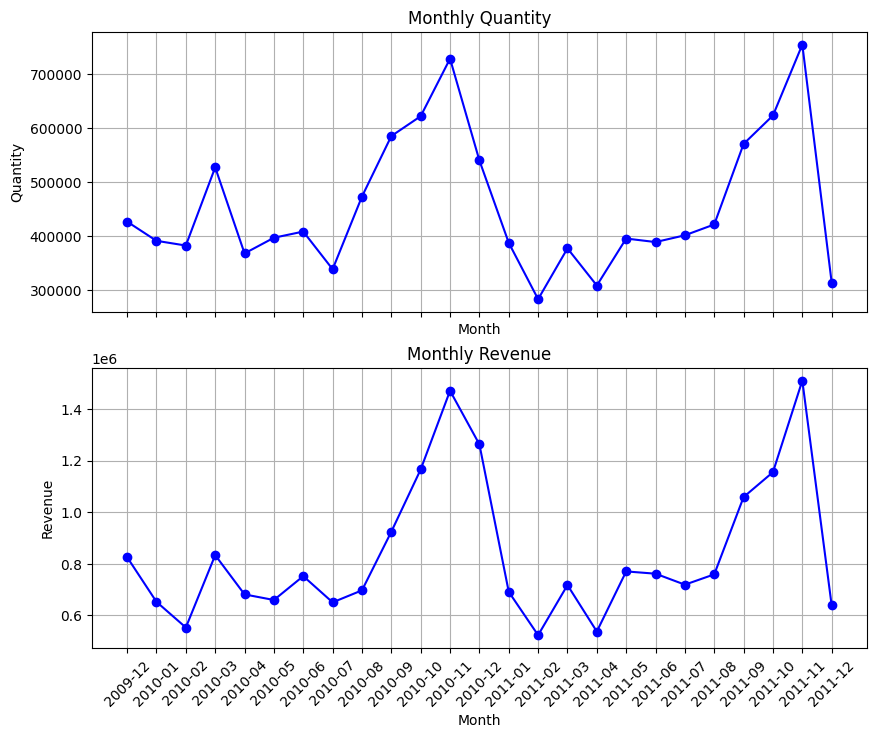

In [31]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

axs[0].plot(monthly_quantity.index, monthly_quantity.values, marker='o', color='blue', label='Quantity')
axs[0].set_title("Monthly Quantity")
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Quantity")
axs[0].grid(True)

axs[1].plot(monthly_revenue.index, monthly_revenue.values, marker='o', color='blue', label='Revenue')
axs[1].set_title("Monthly Revenue")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Revenue")
axs[1].grid(True)

plt.xticks(rotation=45)
plt.show()


### Seaborn

In [32]:
!pip install seaborn

In [33]:
import seaborn as sns

In [34]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-12
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12


In [35]:
df_quantity = df[(df['Quantity'] > 0) & (df['Quantity'] < 100)]

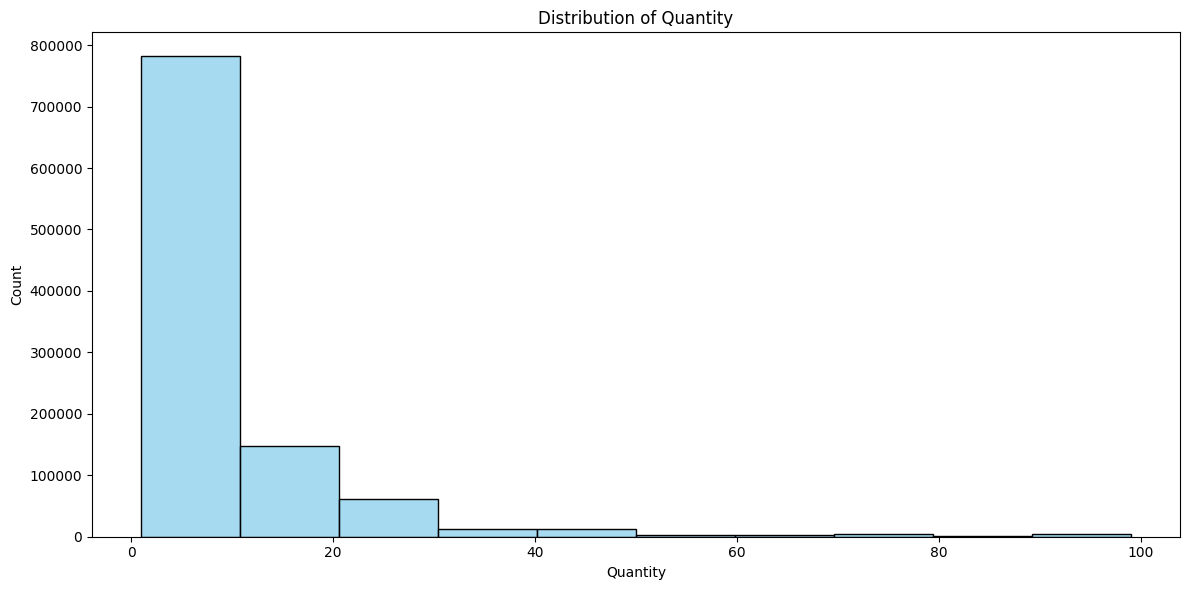

In [38]:
plt.figure(figsize=(12, 6))
sns.histplot(df_quantity['Quantity'], bins=10, kde=False, color='skyblue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

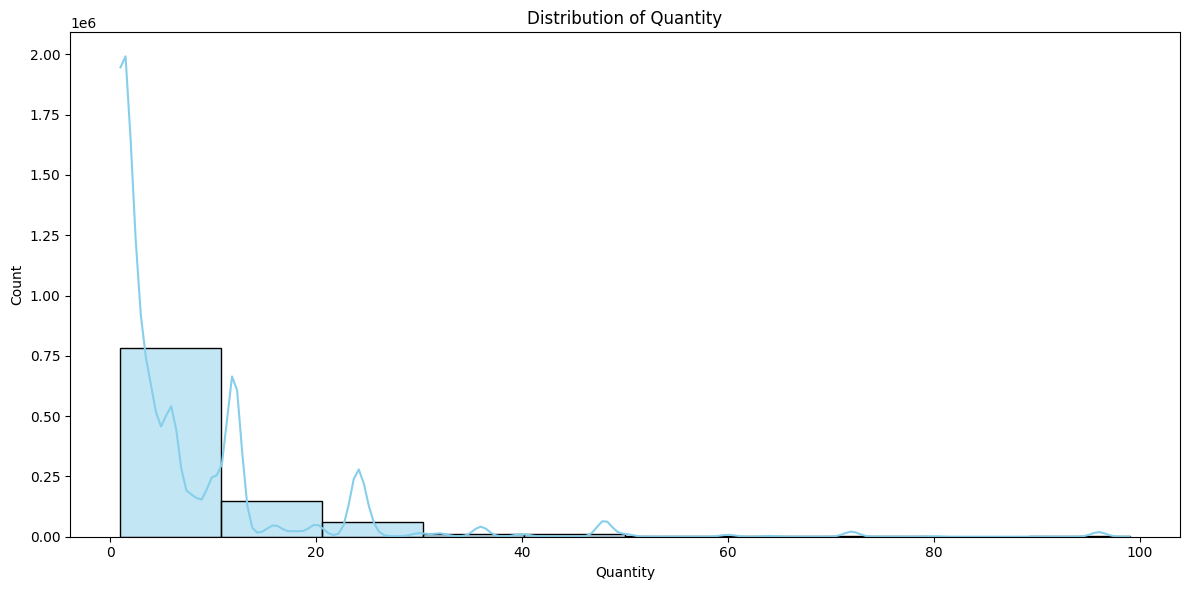

In [39]:
plt.figure(figsize=(12, 6))
sns.histplot(df_quantity['Quantity'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

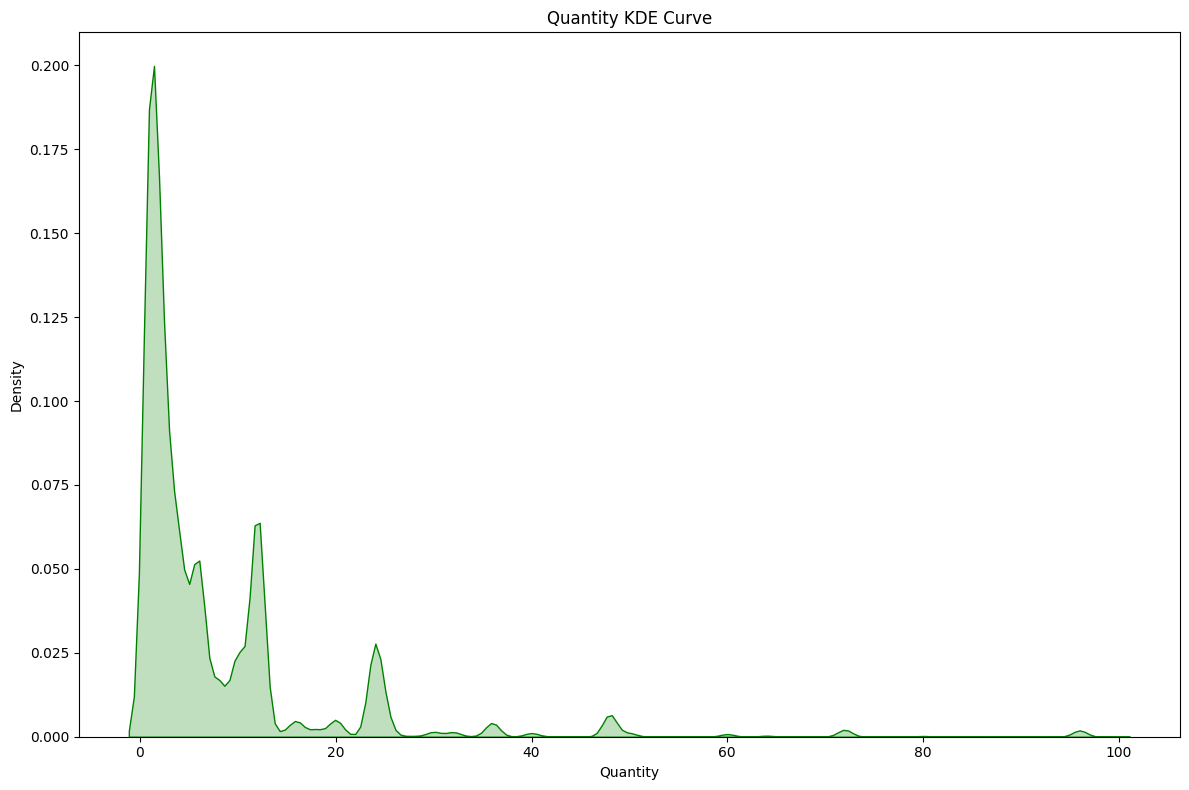

In [42]:
plt.figure(figsize=(12, 8))
sns.kdeplot(df_quantity['Quantity'], fill=True, color='green')
plt.title('Quantity KDE Curve')
plt.xlabel('Quantity')
plt.tight_layout()
plt.show()

In [43]:
top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

In [44]:
top_countries

Country
United Kingdom    1.787098e+07
EIRE              6.644318e+05
Netherlands       5.542323e+05
Germany           4.312625e+05
France            3.569446e+05
Australia         1.699681e+05
Spain             1.091785e+05
Switzerland       1.010113e+05
Sweden            9.190372e+04
Denmark           6.986219e+04
Name: Revenue, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_15736\3104011613.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


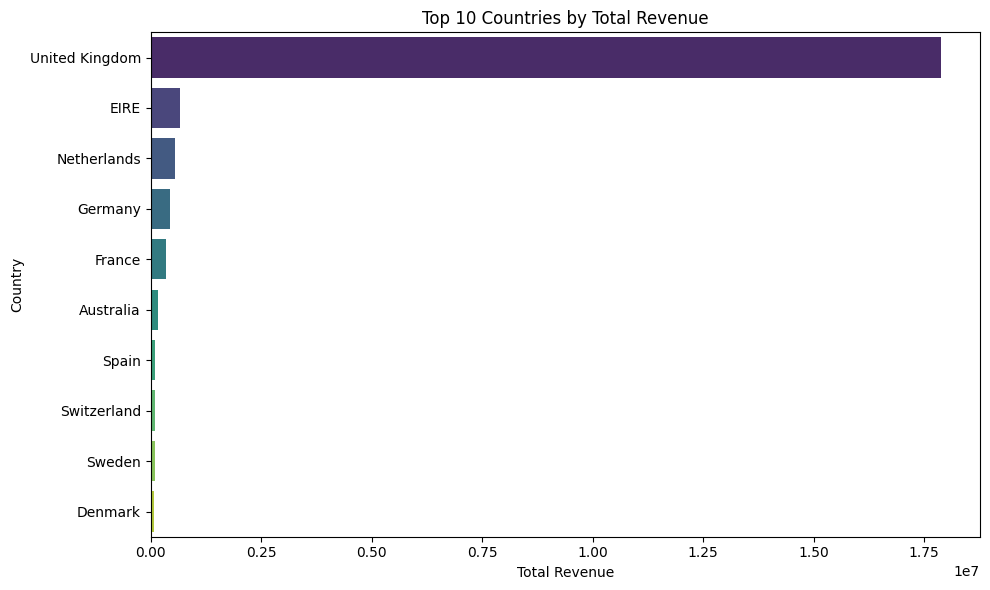

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

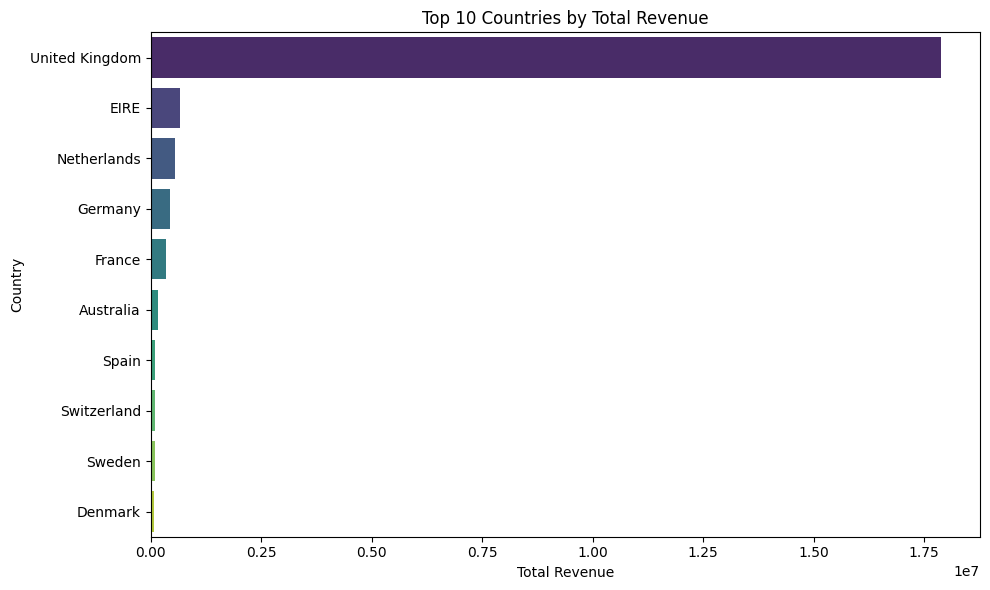

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

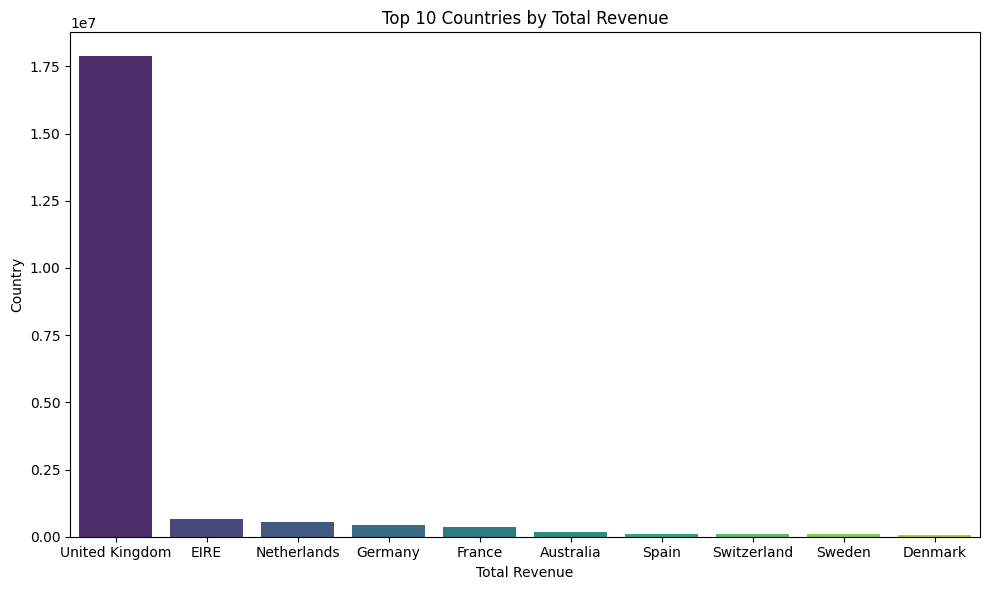

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [48]:
df_sample = df[['Quantity', 'Price', 'Revenue', 'Country', 'Month']].copy()

In [49]:
df_sample

,Quantity,Price,Revenue,Country,Month
0,12,6.95,83.40,United Kingdom,2009-12
1,12,6.75,81.00,United Kingdom,2009-12
2,12,6.75,81.00,United Kingdom,2009-12
3,48,2.10,100.80,United Kingdom,2009-12
4,24,1.25,30.00,United Kingdom,2009-12
...,...,...,...,...,...
1067366,6,2.10,12.60,France,2011-12
1067367,4,4.15,16.60,France,2011-12
1067368,4,4.15,16.60,France,2011-12
1067369,3,4.95,14.85,France,2011-12


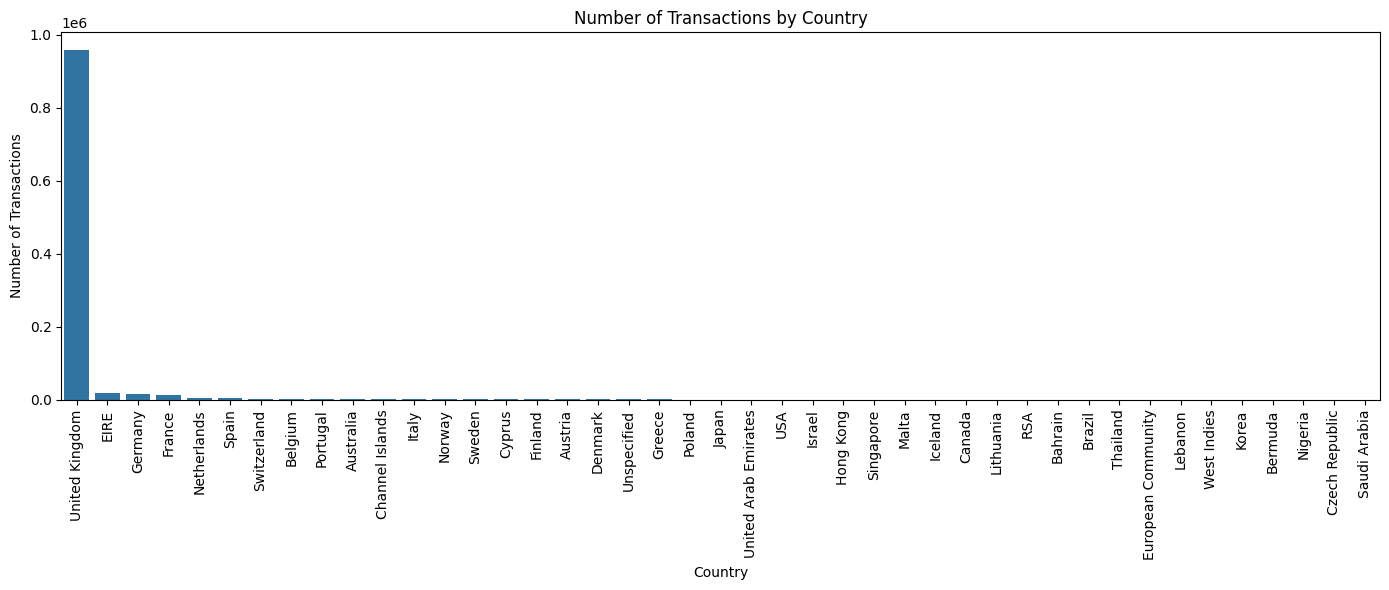

In [50]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_sample, x='Country', order=df_sample['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

In [51]:
# Top 5 countries by number of transactions

top_countries = df['Country'].value_counts().head(5).index.tolist()

# Filter df to keep only those countries
df_top = df[df['Country'].isin(top_countries)].copy()

# Group by Country and Month, Sum the revenue
grouped = df_top.groupby(['Country', 'Month'])['Revenue'].sum().reset_index()

In [52]:
grouped

,Country,Month,Revenue
0,EIRE,2009-12,20099.740
1,EIRE,2010-01,65258.430
2,EIRE,2010-02,21538.800
3,EIRE,2010-03,22989.460
4,EIRE,2010-04,23929.480
...,...,...,...
120,United Kingdom,2011-08,608047.480
121,United Kingdom,2011-09,897076.472
122,United Kingdom,2011-10,938975.010
123,United Kingdom,2011-11,1325346.210


In [53]:
grouped['Month'] = pd.to_datetime(grouped['Month'])
grouped = grouped.sort_values('Month')
grouped['Month'] = grouped['Month'].dt.strftime('%Y-%m')

In [54]:
grouped

,Country,Month,Revenue
0,EIRE,2009-12,20099.74
100,United Kingdom,2009-12,750317.22
25,France,2009-12,6521.69
75,Netherlands,2009-12,15204.73
50,Germany,2009-12,10096.85
...,...,...,...
74,Germany,2011-12,7984.17
49,France,2011-12,7294.92
24,EIRE,2011-12,7340.89
99,Netherlands,2011-12,11728.02


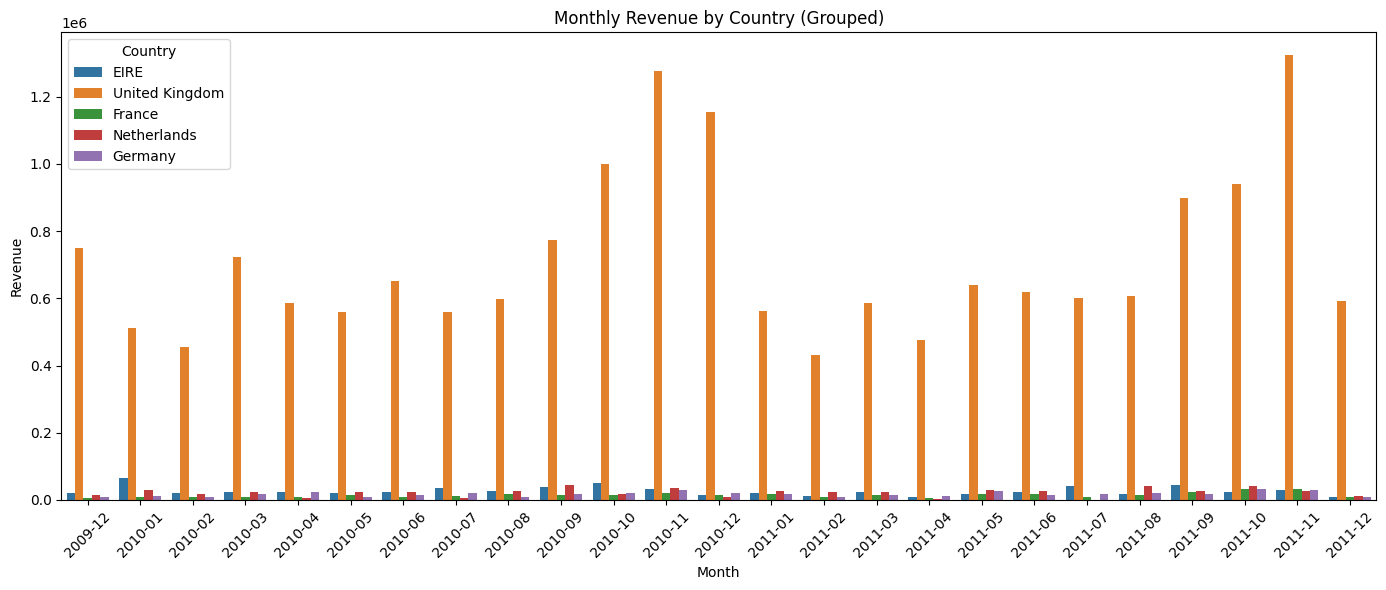

In [55]:
plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x='Month', y='Revenue', hue='Country')
plt.title('Monthly Revenue by Country (Grouped)')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Country')
plt.show()

In [57]:
# Stacked Barplot

pivot_df = grouped.pivot(index='Month', columns='Country', values='Revenue').fillna(0)

In [58]:
pivot_df

Country,EIRE,France,Germany,Netherlands,United Kingdom
Month,,,,,
2009-12,20099.74,6521.69,10096.850,15204.73,750317.220
2010-01,65258.43,8465.63,12562.110,29230.77,511797.662
2010-02,21538.80,9024.16,9124.250,17255.39,454762.716
2010-03,22989.46,8657.59,16698.080,24447.98,721530.211
2010-04,23929.48,7642.98,23683.231,6888.78,584609.731
2010-05,19121.93,13958.15,9108.360,22416.53,560187.810
2010-06,22934.34,9172.54,15678.630,24224.51,652412.490
2010-07,35722.32,11546.64,20274.290,5534.29,559442.540
2010-08,26005.71,16570.32,9943.120,25028.69,596550.350


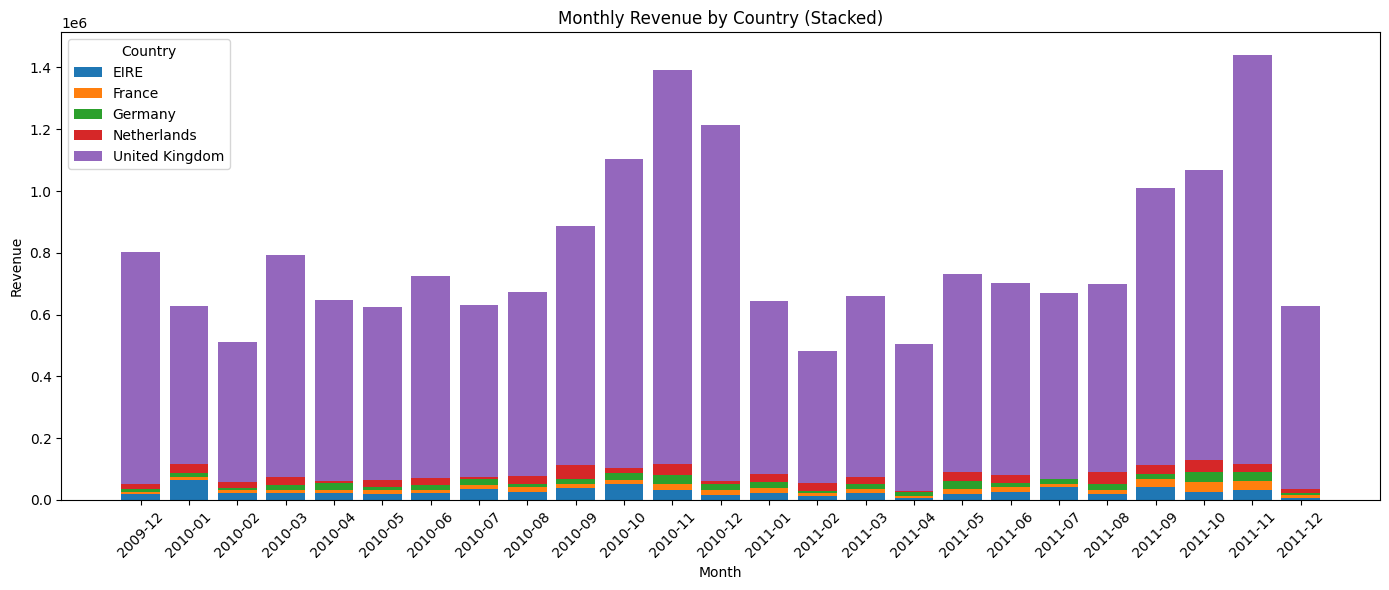

In [61]:
plt.figure(figsize=(14, 6))
bottom = None

for country in pivot_df.columns:
    plt.bar(pivot_df.index, pivot_df[country], label=country, bottom=bottom)
    bottom = pivot_df[country] if bottom is None else bottom + pivot_df[country]

plt.title('Monthly Revenue by Country (Stacked)')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

In [62]:
df_sample

,Quantity,Price,Revenue,Country,Month
0,12,6.95,83.40,United Kingdom,2009-12
1,12,6.75,81.00,United Kingdom,2009-12
2,12,6.75,81.00,United Kingdom,2009-12
3,48,2.10,100.80,United Kingdom,2009-12
4,24,1.25,30.00,United Kingdom,2009-12
...,...,...,...,...,...
1067366,6,2.10,12.60,France,2011-12
1067367,4,4.15,16.60,France,2011-12
1067368,4,4.15,16.60,France,2011-12
1067369,3,4.95,14.85,France,2011-12


c:\Users\HP\miniconda3\envs\cv_collection_review_rnd\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


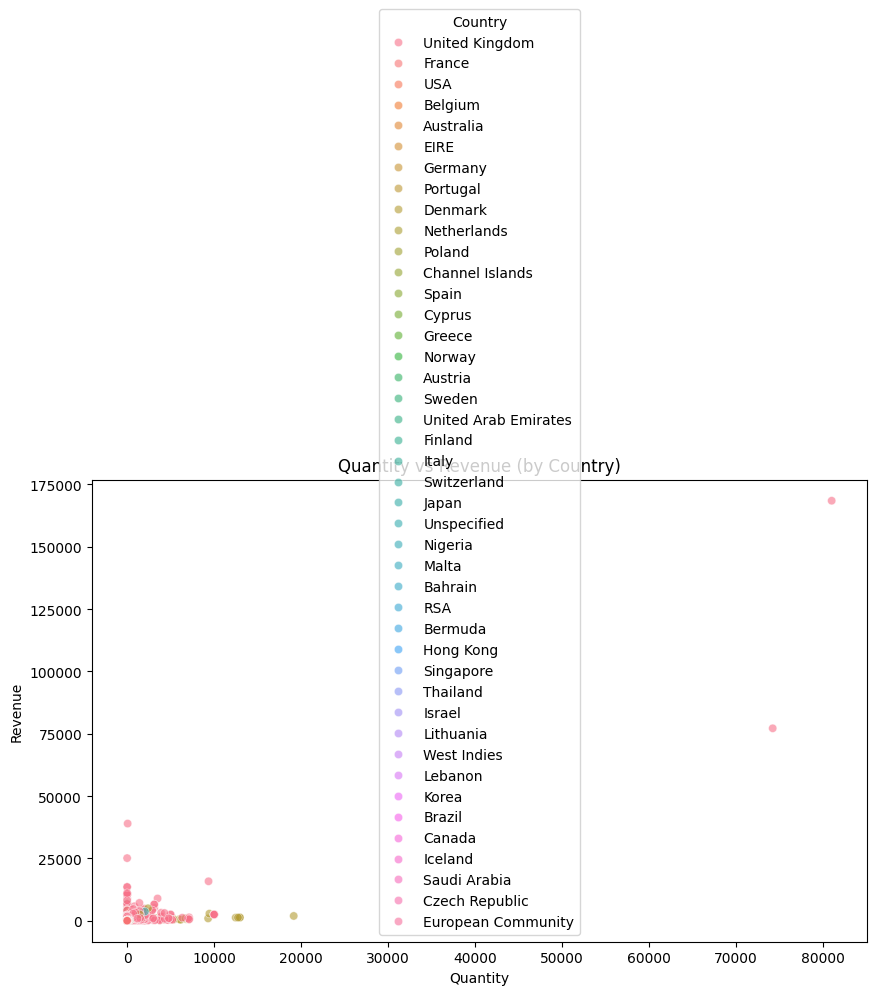

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='Quantity', y='Revenue', hue='Country', alpha=0.6)
plt.title("Quantity vs Revenue (by Country)")
plt.xlabel("Quantity")
plt.ylabel("Revenue")
plt.show()

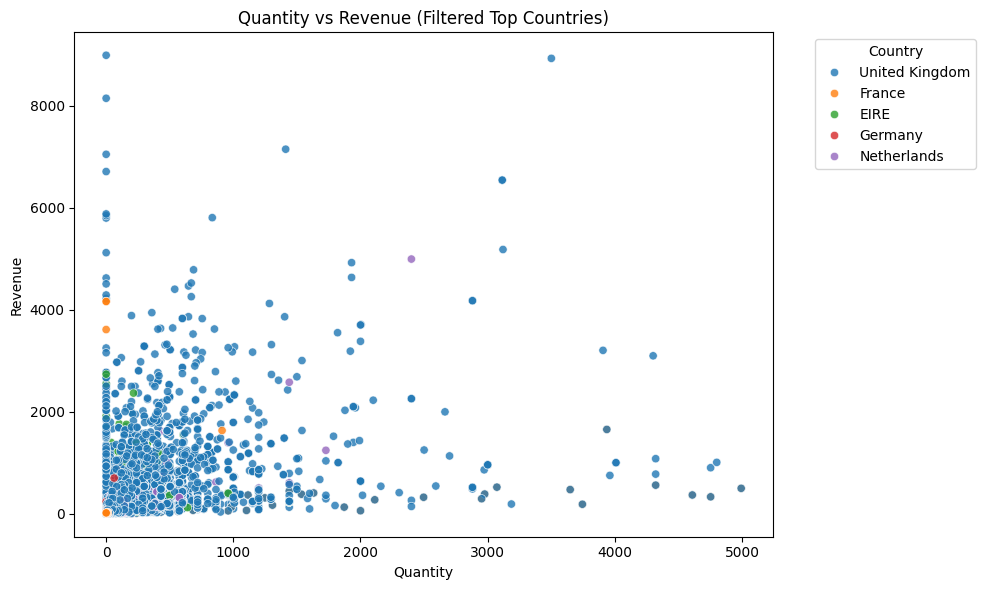

In [65]:
df_filtered = df_sample[(df_sample['Quantity'] > 0) & 
                        (df_sample['Quantity'] < 5000) & 
                        (df_sample['Revenue'] < 10000) & 
                        (df_sample['Revenue'] > 0)]

# Focus on top countries
top_countries = df_filtered['Country'].value_counts().head(5).index
df_filtered = df_filtered[df_filtered['Country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Quantity', y='Revenue', hue='Country', alpha=0.8)
plt.title("Quantity vs Revenue (Filtered Top Countries)")
plt.xlabel("Quantity")
plt.ylabel("Revenue")

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

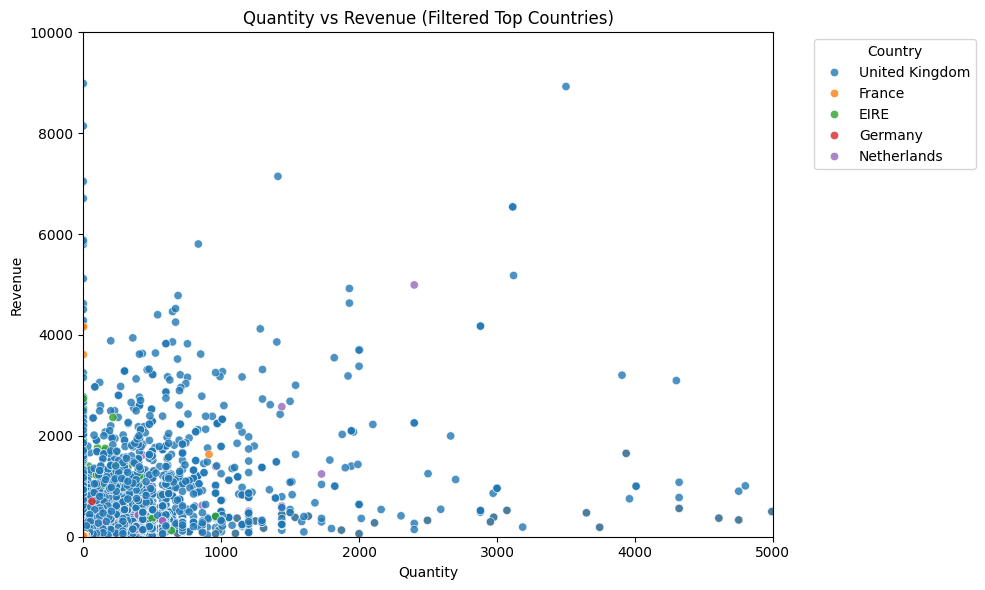

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='Quantity', y='Revenue', hue='Country', alpha=0.8)
plt.title("Quantity vs Revenue (Filtered Top Countries)")
plt.xlabel("Quantity")
plt.ylabel("Revenue")

plt.xlim(0, 5000)
plt.ylim(0, 10000)

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

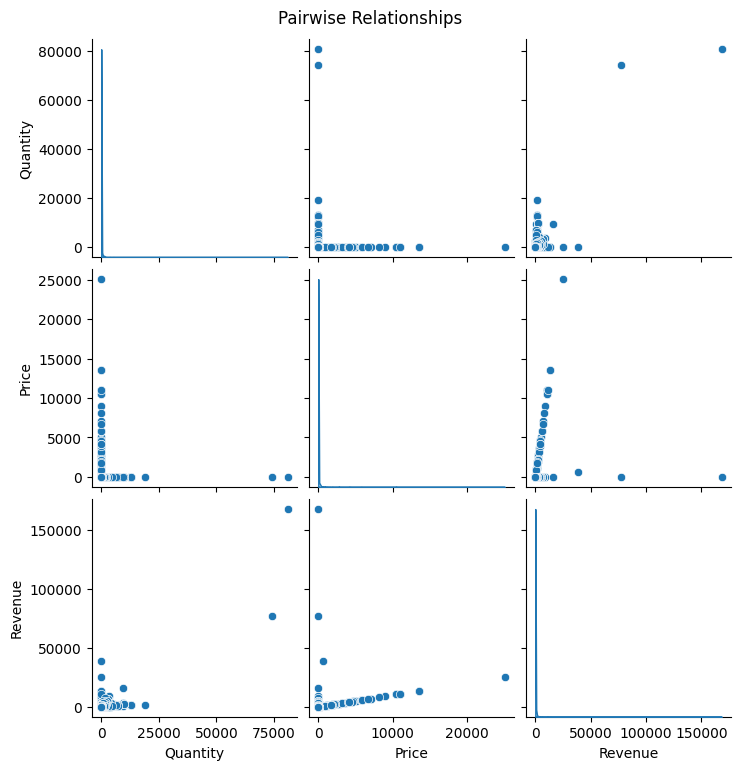

In [67]:
sns.pairplot(df_sample[['Quantity', 'Price', 'Revenue']], diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [68]:
corr_matrix = df_sample[['Quantity', 'Price', 'Revenue']].corr()

corr_matrix

,Quantity,Price,Revenue
Quantity,1.000000,-0.003773,0.804553
Price,-0.003773,1.000000,0.255120
Revenue,0.804553,0.255120,1.000000


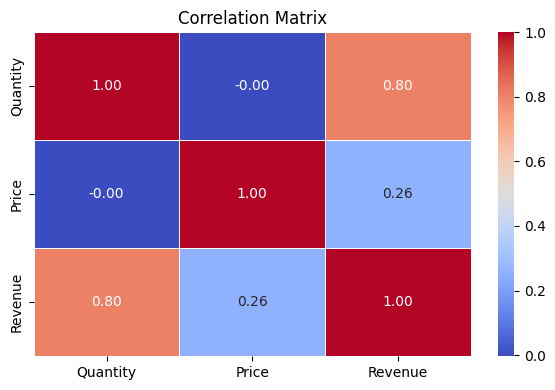

In [69]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [70]:
df_sample

,Quantity,Price,Revenue,Country,Month
0,12,6.95,83.40,United Kingdom,2009-12
1,12,6.75,81.00,United Kingdom,2009-12
2,12,6.75,81.00,United Kingdom,2009-12
3,48,2.10,100.80,United Kingdom,2009-12
4,24,1.25,30.00,United Kingdom,2009-12
...,...,...,...,...,...
1067366,6,2.10,12.60,France,2011-12
1067367,4,4.15,16.60,France,2011-12
1067368,4,4.15,16.60,France,2011-12
1067369,3,4.95,14.85,France,2011-12


C:\Users\HP\AppData\Local\Temp\ipykernel_15736\2973143660.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.index, y=country_revenue.values, palette='magma')


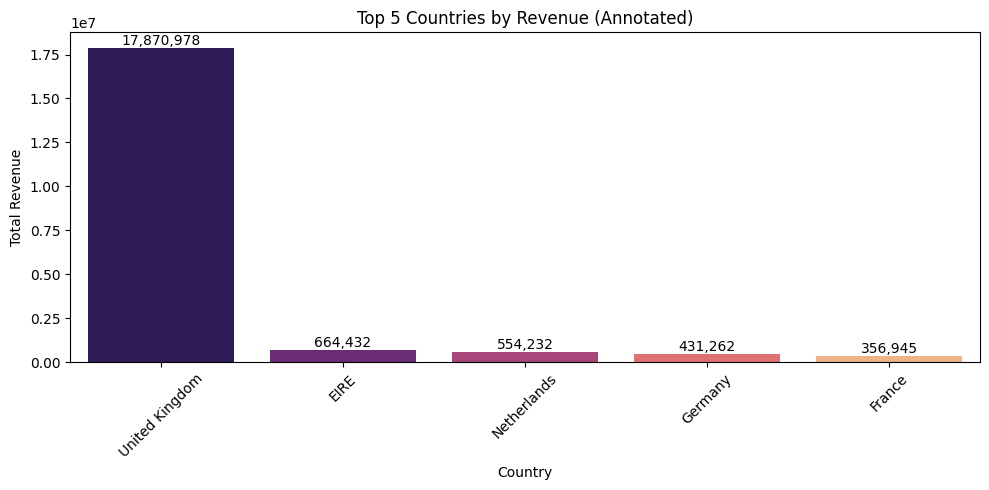

In [71]:
# Annotating Plots

country_revenue = df_sample.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 5))
sns.barplot(x=country_revenue.index, y=country_revenue.values, palette='magma')

# Annotating each bar with value
for i, value in enumerate(country_revenue.values):
    plt.text(i, value + 1000, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

plt.title("Top 5 Countries by Revenue (Annotated)")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15736\932696592.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sample[df_sample['Country'].isin(['Germany', 'France', 'United Kingdom'])],


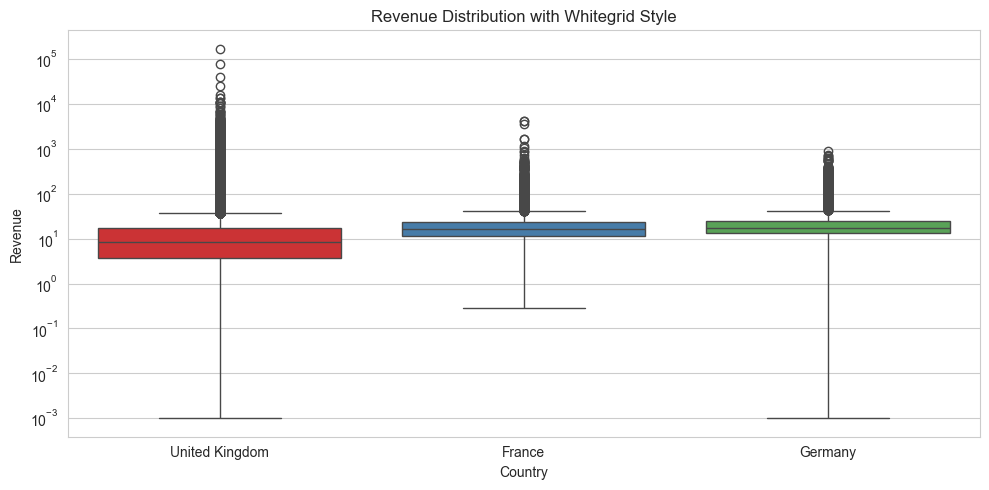

In [75]:
# styles and themes

sns.set_style("whitegrid")  # sets overall look

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_sample[df_sample['Country'].isin(['Germany', 'France', 'United Kingdom'])],
            x='Country', y='Revenue', palette='Set1')
sns.despine(left=False, bottom=False, top=False, right=False)  # removes top and right border

plt.title("Revenue Distribution with Whitegrid Style")
plt.yscale('log')
plt.tight_layout()
plt.show()

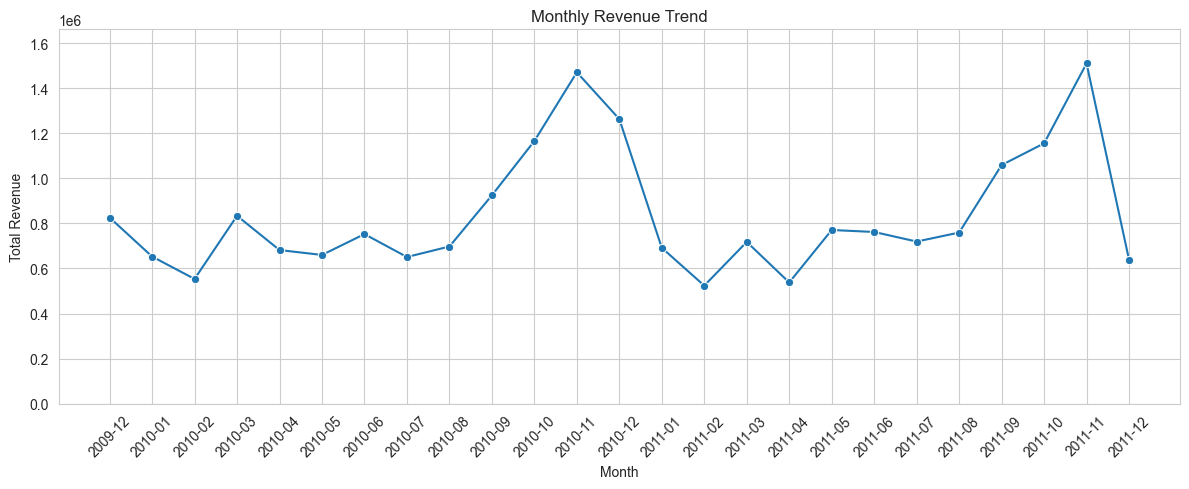

In [76]:
monthly_rev = df_sample.groupby('Month')['Revenue'].sum().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_rev.index, y=monthly_rev.values, marker='o')

plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.ylim(0, monthly_rev.max() * 1.1)  # setting y-limit
plt.ylabel("Total Revenue")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

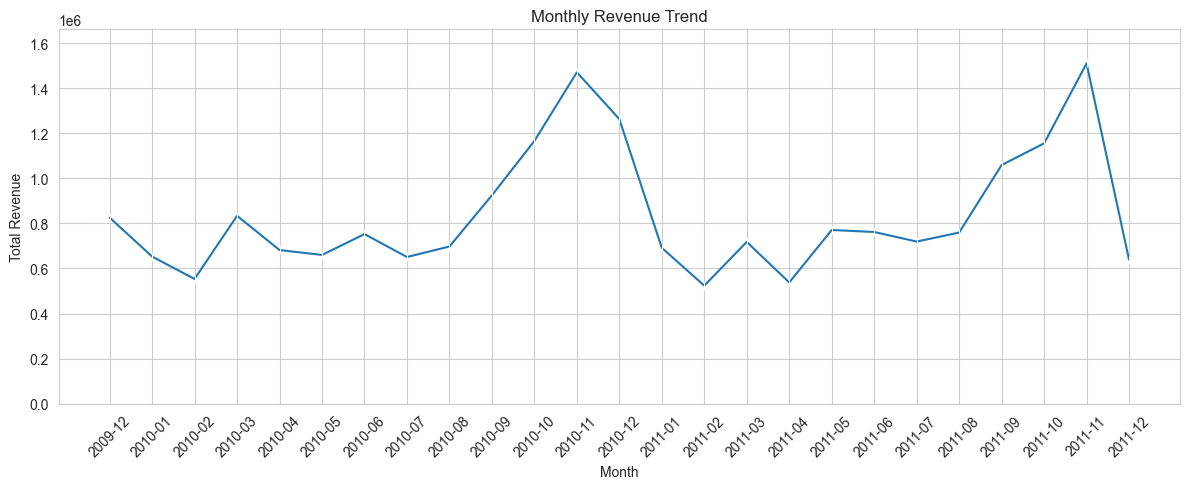

In [77]:
monthly_rev = df_sample.groupby('Month')['Revenue'].sum().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_rev.index, y=monthly_rev.values, marker='|') # No marker using Pipe Symbol

plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.ylim(0, monthly_rev.max() * 1.1)  # setting y-limit
plt.ylabel("Total Revenue")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

In [78]:
# Combining Plots with FacetGrid

top3 = ['United Kingdom', 'Germany', 'France']
df_subset = df[df['Country'].isin(top3)].copy()

df_subset_grouped = df_subset.groupby(['Month', 'Country'])['Revenue'].sum().reset_index()

In [79]:
df_subset_grouped

,Month,Country,Revenue
0,2009-12,France,6521.69
1,2009-12,Germany,10096.85
2,2009-12,United Kingdom,750317.22
3,2010-01,France,8465.63
4,2010-01,Germany,12562.11
...,...,...,...
70,2011-11,Germany,28025.02
71,2011-11,United Kingdom,1325346.21
72,2011-12,France,7294.92
73,2011-12,Germany,7984.17


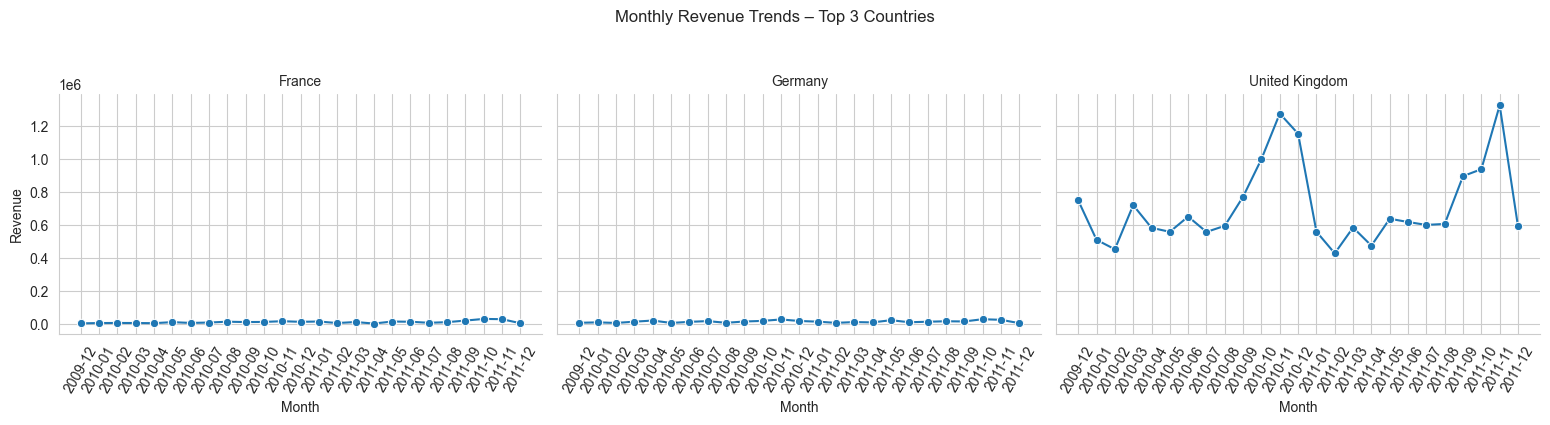

In [80]:
g = sns.FacetGrid(df_subset_grouped, col='Country', col_wrap=3, height=4, aspect=1.3)
g.map_dataframe(sns.lineplot, x='Month', y='Revenue', marker='o')
g.set_titles("{col_name}")
g.set_xticklabels(rotation=60)
g.figure.suptitle("Monthly Revenue Trends – Top 3 Countries", y=1.05)
plt.tight_layout()
plt.show()